In [84]:
import seaborn as sns
import pandas as pd

df_16 = pd.read_csv("../results/16jobs_results.csv")
df_4 = pd.read_csv("../results/4jobs_results.csv")


In [85]:
df_16

,experiment,repetition,runtime,max_mem
0,lustre,0,74.89,1942844
1,lustre,0,75.42,1942156
2,mem_all,0,143.03,1961564
3,mem_final,0,184.31,1960364
4,lustre,1,54.58,1939564
5,mem_final,1,184.28,1958296
6,lustre,1,54.51,1942788
7,mem_all,1,143.67,1959804
8,lustre,2,70.98,1942112
9,mem_final,2,186.34,1958784


# Experiment 1 - 16 parallel jobs & 39 617MB images incremented 10 times (total data generated: ~234GiB)

(0.0, 193.0525)

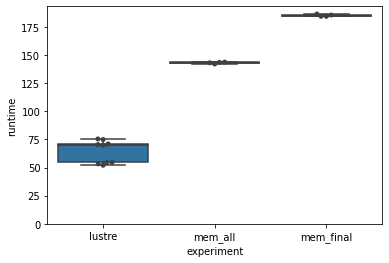

In [86]:
ax = sns.boxplot(x="experiment", y="runtime", data=df_16)
ax = sns.swarmplot(x="experiment", y="runtime", data=df_16, color=".25")
ax.set_ylim(bottom=0)

## Experiment 2 - 4 parallel jobs & 39 617MB images incremented 10 times (total data generated:~234GiB)

(0.0, 202.513)

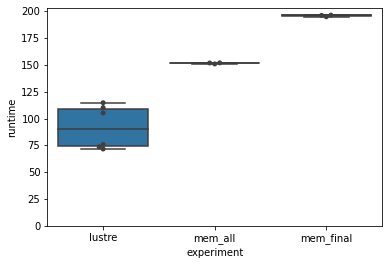

In [87]:
ax = sns.boxplot(x="experiment", y="runtime", data=df_4)
ax = sns.swarmplot(x="experiment", y="runtime", data=df_4, color=".25")
ax.set_ylim(bottom=0)

## Experiment 3 - 16 parallel jobs & Single node multidisk (all 6) & 39 617MB images incremented 10 times

In [88]:
multidisk = pd.read_csv("../results/multidisk_res-2.csv")
print(multidisk)
multidisk['flush_time'] = multidisk['flush_time'].apply(lambda x: x.split(' ')[-1])
multidisk['flush_time_s'] = multidisk['flush_time'].apply(lambda x: float(x.strip('s').split('m')[0])*60
                                                              if 'm' in x else float(x))
multidisk['flush_time'] = multidisk['flush_time'].apply(lambda x: float(x.strip('s').split('m')[0]) if 'm' in x else x)
multidisk['flush_time_s'] = multidisk['flush_time'] + multidisk['flush_time_s']
multidisk['runtime'] = multidisk['runtime'].apply(lambda x: float(x))

  experiment  repetition  runtime  max_mem  \
0  mem_final           0    53.15  1991536   
1    mem_all           0    53.54  1992080   
2     lustre           0    73.63  1941532   
3  mem_final           1    80.16  1990180   
4     lustre           1    57.23  1940736   
5    mem_all           1    74.67  1989860   
6  mem_final           2    76.80  1990944   
7    mem_all           2    51.55  1992792   
8     lustre           2    76.25  1941536   

                                flush_time  disk_files  total_flush  
0                                0m30.502s           6           22  
1  0m1.781s real 0m45.014s real 10m11.614s         152          399  
2                                        0           0          399  
3                                0m19.154s          14           28  
4                                        0           0           28  
5                  0m1.722s real 10m2.996s           0           63  
6                   0m0.062s real 0m1.819s       

TypeError: can only concatenate str (not "float") to str

In [91]:
multidisk

,experiment,repetition,runtime,max_mem,flush_time,disk_files,total_flush,flush_time_s
0,mem_final,0,53.15,1991536,0,6,22,0.0
1,mem_all,0,653.54,1992080,10,152,399,600.0
2,lustre,0,73.63,1941532,0,0,399,0.0
3,mem_final,1,80.16,1990180,0,14,28,0.0
4,lustre,1,57.23,1940736,0,0,28,0.0
5,mem_all,1,674.67,1989860,10,0,63,600.0
6,mem_final,2,76.80,1990944,0,22,40,0.0
7,mem_all,2,111.55,1992792,1,129,506,60.0
8,lustre,2,76.25,1941536,0,0,506,0.0


(0.0, 81.59049999999999)

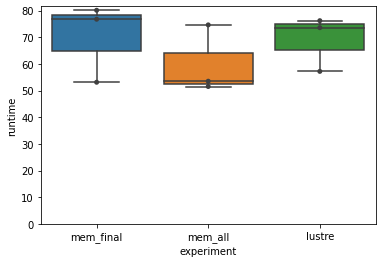

In [89]:
ax = sns.boxplot(x="experiment", y="runtime", data=multidisk)
ax = sns.swarmplot(x="experiment", y="runtime", data=multidisk, color=".25")
ax.set_ylim(bottom=0)

(0.0, 705.746)

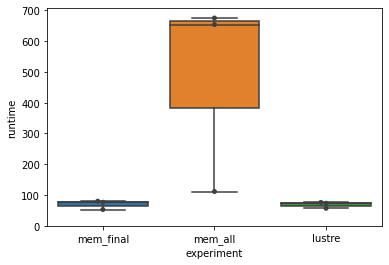

In [90]:
multidisk['runtime'] = multidisk['runtime'] + multidisk['flush_time_s']
ax = sns.boxplot(x="experiment", y="runtime", data=multidisk)
ax = sns.swarmplot(x="experiment", y="runtime", data=multidisk, color=".25")
ax.set_ylim(bottom=0)

In [93]:
multidisk = pd.read_csv("../results/multidisk_res-2.csv")
multidisk

,experiment,repetition,runtime,max_mem,flush_time,disk_files,total_flush
0,mem_final,0,53.15,1991536,0m30.502s,6,22
1,mem_all,0,53.54,1992080,0m1.781s real 0m45.014s real 10m11.614s,152,399
2,lustre,0,73.63,1941532,0,0,399
3,mem_final,1,80.16,1990180,0m19.154s,14,28
4,lustre,1,57.23,1940736,0,0,28
5,mem_all,1,74.67,1989860,0m1.722s real 10m2.996s,0,63
6,mem_final,2,76.80,1990944,0m0.062s real 0m1.819s,22,40
7,mem_all,2,51.55,1992792,1m17.909s,129,506
8,lustre,2,76.25,1941536,0,0,506
